<a href="https://colab.research.google.com/github/louise-queiroz/CNC/blob/main/Relat%C3%B3rio3_LouiseQueirozdaSilvaBezerra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatório 3
Nome: Louise Queiroz da Silva Bezerra <br>
Matrícula: 20200742

In [ ]:
# Biblioteca
import math
import numpy as np
import matplotlib.pyplot as plt

#Métodos

##Forma de Lagrange

In [ ]:
def poliLagrange(m, x, y, z):
  pz = 0
  for i in range(m):
    c = 1
    d = 1
    for j in range (m):
      if i!=j:
        c *= (z-x[j])
        d *= (x[i] - x[j])
    if d != 0:
      pz += (y[i] * c/d)
  return pz

##Forma de Newton

In [ ]:
def poliNewton(m, x, y, z):
    pz = 0
    dely = [0] * m

    for i in range(m):
        dely[i] = y[i]

    for i in range(1, m):
        for k in range(m - 1, i - 1, -1):
            if x[k] - x[k - i] != 0:
                dely[k] = (dely[k] - dely[k - 1]) / (x[k] - x[k - i])

    pz = dely[m - 1]

    for i in range(m - 2, -1, -1):
        pz = pz * (z - x[i]) + dely[i]

    return pz


## Spline Cúbica Natural

In [ ]:
def spline(x1, y):
    n=len(y)
    a = np.copy(y)
    b = [0] * (n-1)
    d = [0] * (n-1)
    h = [0] * (n-1)

    for i in range(n-1):
        h[i] = x[i+1] - x[i]

    A = [[1] + [0] * (n - 1)]

    for i in range(1, n-1):
        linha = [0] * n
        linha[i - 1] = h[i - 1]
        linha[i] = 2*(h[i-1] + h[i])
        linha[i+1] = h[i]
        A.append(linha)

    A.append([0] * (n-1) + [1])

    B = [0]

    for i in range(1, n-1):
        linha = 3*(a[i+1] - a[i]) / h[i] - 3 * (a[i] - a[i-1]) / h[i-1]
        B.append(linha)
    B.append(0)

    c =  np.linalg.solve(A, B)

    for i in range(n-1):
        b[i] = (a[i+1]-a[i])/h[i] - (h[i]/3)*(c[i+1]+2*c[i])
        d[i] = (c[i+1]-c[i])/(3*h[i])

    s = []

    for i in range(n-1):
        s.append(lambda x, j=i: d[j]*((x-x1[j])**3) + c[j]*((x-x1[j])**2) + b[j]*(x-x1[j]) + a[j])

    return s

## Aproximação Linear MMQ

In [ ]:
def MMQ(x, y, grau='linear'):
    n = len(x)
    roots = np.zeros(n)
    xy = np.zeros(n)
    xx = np.zeros(n)
    xxx = np.zeros(n)
    x4 = np.zeros(n)
    x2y = np.zeros(n)

    for i in range(n):
        xy[i] = x[i] * y[i]
        xx[i] = x[i] ** 2
        xxx[i] = x[i] ** 3
        x4[i] = x[i] ** 4
        x2y[i] = (x[i]**2) * y[i]

    sumx = sum(x)
    sumy = sum(y)
    sumxy = sum(xy)
    sumx2 = sum(xx)
    sumx3 = sum(xxx)
    sumx4 = sum(x4)
    sumx2y = sum(x2y)

    if grau == 'linear':
        a = (n * sumxy - sumx * sumy) / (n * sumx2 - sumx**2)
        b = (sumy * sumx2 - sumx * sumxy) / (n * sumx2 - sumx**2)
        f = lambda x: a * x + b
    elif grau == 'parabola':
        a = (n * (sumx2y - sumx * sumxy) - (sumxy*(sumx**2) - sumy*sumx2)) / (n * (sumx4 - (sumx2**2)) - (sumx2*(sumx**2) - sumx*sumx3))
        b = (n * (sumxy * sumx3 - sumy*sumx4) - (sumx*sumy*sumx2 - sumy*(sumx2**2))) / (n*(sumx4 - (sumx2**2)) - (sumx2*(sumx**2) - sumx*sumx3))
        c = (sumy - b*sumx - a*sumx2) / n
        f = lambda x: a * x ** 2 + b * x + c
    elif grau == 'potencia':
        log_x = np.log(x + 1e-10)  # evitar log(0)
        log_y = np.log(y + 1e-10)
        b = (n * sumxy - sumx * sumy) / (n * sumx2 - sumx**2)
        a = np.exp((sumy - b * sumx) / n)

        f = lambda x: a * np.exp(b * x)


    for i in range(n):
        roots[i] = f(x[i])

    if grau == 'linear':
        return a, b, None, roots
    elif grau == 'parabola':
        return a, b, c, roots
    elif grau == 'potencia':
        return a, b, None, roots

# Questões

## 1)
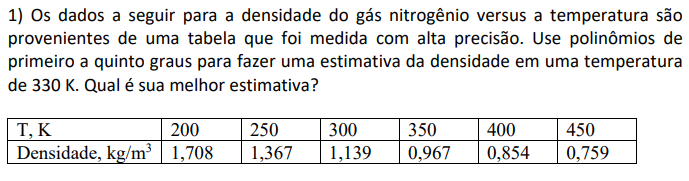

In [ ]:
x  = [200, 250, 300, 350, 400, 450]
y = [1.708, 1.367, 1.139, 0.967, 0.854, 0.759]
z = 330

for m in range(len(x)-1):
  print("--- Grau", m + 1, "---", "\n", "Lagrange:", poliLagrange(m+1, x, y, z), "|", "Newton:", poliNewton(m+1, x, y, z))

--- Grau 1 --- 
 Lagrange: 1.708 | Newton: 1.708
--- Grau 2 --- 
 Lagrange: 0.8214000000000006 | Newton: 0.8214
--- Grau 3 --- 
 Lagrange: 1.0564400000000003 | Newton: 1.0564399999999998
--- Grau 4 --- 
 Lagrange: 1.032728 | Newton: 1.032728
--- Grau 5 --- 
 Lagrange: 1.030232 | Newton: 1.0302319999999998


**Resposta:** Os resultados obtidos para a estimativa da densidade do gás nitrogênio em 330 K variam de acordo com o grau do polinômio e o método de interpolação utilizado. Todos os resultados dos 5 graus foram similares, apenas em alguns casos obtiveram uma leve diferença devido a arredondação.
Em resumo, os resultados da interpolação para a temperatura de 330 K variam de acordo com o método e o grau do polinômio escolhidos. A escolha entre os métodos e graus deve ser feita considerando as características específicas dos dados e a precisão desejada na interpolação.

##2)
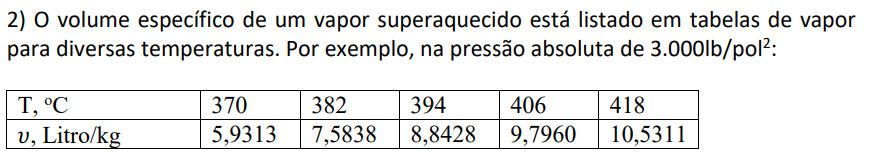

In [ ]:
x = np.array([370, 382, 394, 406, 418])
y = np.array([5.9313, 7.5838, 8.8428, 9.7960, 10.5311])
z = 400
v = poliLagrange(len(x), x, y, z)
print('Resultado Lagrange: ', v)

v = poliNewton(len(x), x, y, z)
print('Resultado Newton: ', v)


Resultado Lagrange:  9.352143749999998
Resultado Newton:  9.35214375


**Resposta**: Ao determinar v = 400º C resultou em 9,35215 em ambos os métodos interpoladores de polinômios.

## 3)
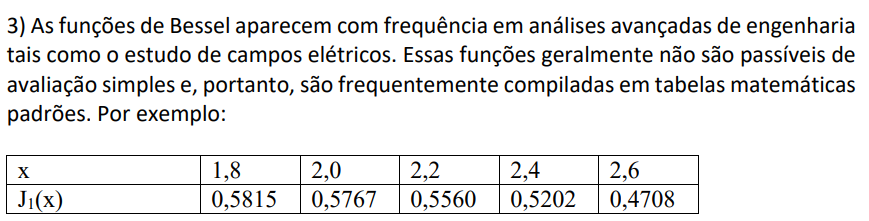

In [ ]:
#A) Estime J1(2,1), a) utilizando um polinômio interpolador

x = np.array([1.8, 2, 2.2, 2.4, 2.6])
y = np.array([0.5815, 0.5767, 0.5560, 0.5202, 0.4708])
z = 2.1

m = len(x)
print("--- Lagrange ---\n", poliLagrange(m,x,y,z))

--- Lagrange ---
 0.5683039062500002


In [ ]:
#B  utilizando splines cúbicas naturais
x = np.array([1.8, 2, 2.2, 2.4, 2.6])
y = np.array([0.5815, 0.5767, 0.5560, 0.5202, 0.4708])
z = 2.1

s = spline(x, y)

print("--- Spline ---\n",  s[1](z))

--- Spline ---
 0.5684613839285715


**Resposta**: Ambos resultados foram iguais e corresponde ao valor verdadeiro de 0,5683. O spline ficou levemente abaixo em uma das casa decimais porém essa pequena discrepância pode ser atribuída às aproximações realizadas durante os cálculos, o que pode introduzir uma margem de erro nas interpolações. A natureza das técnicas de interpolação e as limitações dos métodos numéricos podem resultar em estimativas que se desviam ligeiramente dos valores reais.

## 4)
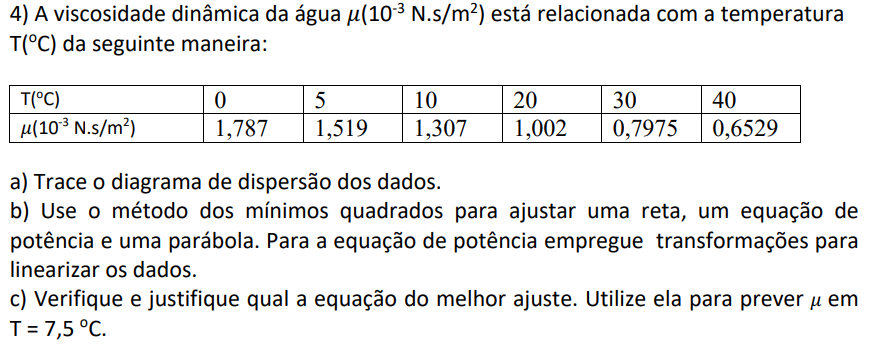

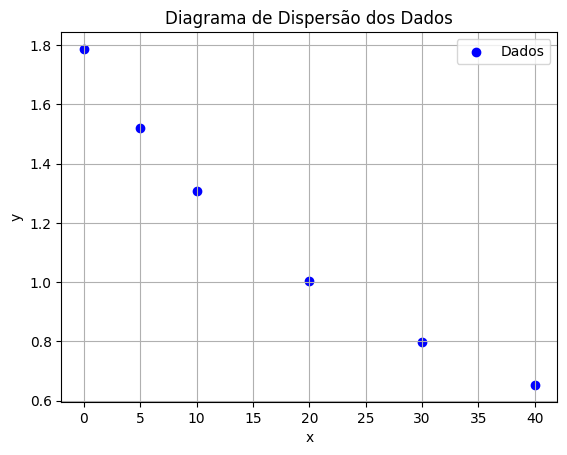

In [ ]:
# A
x = np.array([0,5,10,20,30,40])
y = np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529])

plt.scatter(x, y, color='blue', marker='o', label='Dados')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Diagrama de Dispersão dos Dados')
plt.legend()
plt.grid(True)

plt.show()

--- LINEAR ---
Coeficientes: A: -0.027703999999999996 B: 1.6623866666666665
Função de Ajuste Linear:
f(x) = -0.0277 * x + 1.6624

--- POTÊNCIA --- 
Coeficientes: A: 5.271878057237485 B: -0.027703999999999996
Função de Potência Ajustada:
f(x) = 5.2719 * e^(-0.0277 * x)

--- PARÁBOLA ---
Coeficientes: A: 0.01809426266648967 B: 0.5871278118500814 C:  -18.219694135064966
Função de Parábola Ajustada:
f(x) = 0.0181 * x^2 + 0.5871 * x + -18.2197


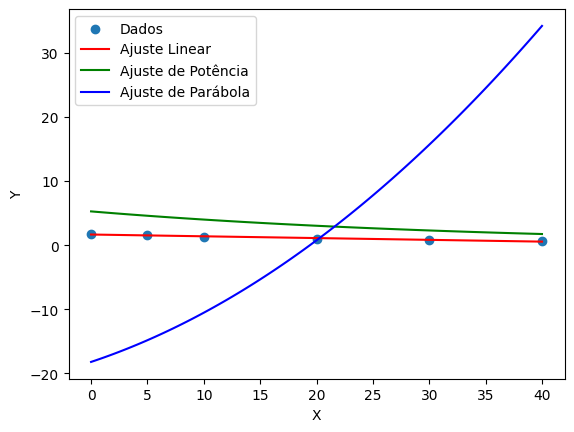

In [ ]:
#B

#LINEAR
print('--- LINEAR ---')
x = np.array([0,5,10,20,30,40])
y = np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529])

a_linear, b_linear, root, _ = MMQ(x, y, grau='linear')
print('Coeficientes: A:', a_linear, 'B:', b_linear)

print("Função de Ajuste Linear:")
print(f"f(x) = {a_linear:.4f} * x + {b_linear:.4f}")

##POTÊNCIA
print('\n--- POTÊNCIA --- ')

a_potencia, b_potencia, root , _ = MMQ(x, y, grau='potencia')

print('Coeficientes: A:', a_potencia, 'B:', b_potencia)
print("Função de Potência Ajustada:")
print(f"f(x) = {a_potencia:.4f} * e^({b_potencia:.4f} * x)")

# PARÁBOLA

print('\n--- PARÁBOLA ---')
a_parabola, b_parabola, c_parabola, root = MMQ(x, y, grau='parabola')

print('Coeficientes: A:', a_parabola, 'B:', b_parabola, 'C: ', c_parabola)
print("Função de Parábola Ajustada:")
print(f"f(x) = {a_parabola:.4f} * x^2 + {b_parabola:.4f} * x + {c_parabola:.4f}")


#grafico
x_points = np.linspace(min(x), max(x), 100)
y_points_linear = a_linear * x_points + b_linear
y_points_potencia = a_potencia * np.exp(b_potencia * x_points)
y_points_parabola = a_parabola * x_points**2 + b_parabola * x_points + c_parabola

plt.scatter(x, y, label='Dados')
plt.plot(x_points, y_points_linear, label='Ajuste Linear', color='red')
plt.plot(x_points, y_points_potencia, label='Ajuste de Potência', color='green')
plt.plot(x_points, y_points_parabola, label='Ajuste de Parábola', color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
# POTÊNCIA E PARÁBOLA
#potencia esta no slide deve usar ln
#parabolar fazer c semi derivada, fazer flag ou 3 funções mmq

In [ ]:
#C

#AJUSTE LINEAR
a_linear, b_linear, _, _ = MMQ(x, y, grau='linear')
t = 7.5
previsao_linear = a_linear * t + b_linear
print(f"Previsão usando ajuste linear para T = {t} oC: {previsao_linear:.4f}")


Previsão usando ajuste linear para T = 7.5 oC: 1.4546


**Resposta:** Para visualizar melhor ops resultados resolvi plotar um gráfico comparando os três resultados para ver qual se encaixa melhor nos pontos, como podemos ver, é uma curva linear e a equação de melhor ajuste é g(x) = ax + b.